In [7]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.stats.weightstats as t
import seaborn as sns
from phik import phik_matrix
import datetime as dt

In [8]:
file_name = 'KPMG_VI_New_raw_data_update_final.xlsx'

In [9]:
demo_df = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic', index_col=0)
demo_df.head()

C:\Users\64223\AppData\Local\Temp\ipykernel_14376\4073139054.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demo_df = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic', index_col=0)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [10]:
demo_df = demo_df.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
demo_df['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
demo_df['gender'].replace('M', 'Male', inplace=True)
demo_df['gender'].replace('U', 'Unknown', inplace=True)
demo_df['deceased_indicator'].replace(['N'], 0, inplace=True)
demo_df['deceased_indicator'].replace(['Y'], 1, inplace=True)
demo_df['owns_car'].replace('Yes', 1, inplace=True)
demo_df['owns_car'].replace('No', 0, inplace=True)
demo_df = demo_df[demo_df['DOB'] != demo_df.DOB.min()]
demo_df[demo_df['deceased_indicator'] == 0]
demo_df = demo_df.drop(['deceased_indicator'], axis=1)
demo_df_clean = demo_df.dropna()
demo_df_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [11]:
demo_df_clean['age'] = (dt.datetime.now() - demo_df_clean['DOB']) / np.timedelta64(1, 'Y')
demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10)) * 10).astype(int)
demo_df_clean.head()

C:\Users\64223\AppData\Local\Temp\ipykernel_14376\3140119255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_clean['age'] = (dt.datetime.now() - demo_df_clean['DOB']) / np.timedelta64(1, 'Y')
C:\Users\64223\AppData\Local\Temp\ipykernel_14376\3140119255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_clean['age_class'] = ((round(demo_df_clean['age'] / 10)) * 10).astype(int)


,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.540303,70
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.361100,40
3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,68.266512,70
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.564780,60
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.611906,60


In [12]:
addr_df = pd.read_excel(file_name, header=1, sheet_name='CustomerAddress', index_col=0)
addr_df.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [13]:
addr_df['state'].replace('New South Wales', 'NSW', inplace=True)
addr_df['state'].replace('Victoria', 'VIC', inplace=True)
addr_df_clean = addr_df.dropna()
addr_df_clean.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [14]:
demo_addr_df = pd.merge(demo_df_clean, addr_df_clean, left_index=True, right_index=True)
demo_addr_df= demo_addr_df.dropna()
demo_addr_df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68.540303,70,060 Morning Avenue,2016,NSW,Australia,10
2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41.361100,40,6 Meadow Vale Court,2153,NSW,Australia,10
4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60.564780,60,0 Holy Cross Court,4211,QLD,Australia,9
6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,55.611906,60,9 Oakridge Court,3216,VIC,Australia,9
7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,46.174341,50,4 Delaware Trail,2210,NSW,Australia,9


In [15]:
txns_df = pd.read_excel(file_name, header=1, sheet_name='Transactions', index_col=0)
txns_df = txns_df.sort_values('customer_id')
txns_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [16]:
txns_df.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [17]:
txns_df.duplicated().sum()

0

In [18]:
txns_df.shape

(20000, 12)

In [19]:
txns_df['product_first_sold_date'] = pd.TimedeltaIndex(txns_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
txns_df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [20]:
txns_df_clean = txns_df.dropna()
txns_df_clean.shape

(19445, 12)

In [21]:
txns_df_clean['transaction_date'].describe()

C:\Users\64223\AppData\Local\Temp\ipykernel_14376\956891290.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  txns_df_clean['transaction_date'].describe()


count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [22]:
most_recent_purchase = txns_df_clean['transaction_date'].max()
txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
txns_df_clean['profit'] = txns_df_clean['list_price'] - txns_df_clean['standard_cost']
txns_df_clean.head()

C:\Users\64223\AppData\Local\Temp\ipykernel_14376\1271546092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
C:\Users\64223\AppData\Local\Temp\ipykernel_14376\1271546092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
C:\Users\64223\AppData\Local\Temp\ipykernel_14376\1271546092.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
transaction_id,,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [23]:
txns_df_clean[txns_df_clean['last_purchase_days_ago'] > 365].shape

(0, 14)

In [24]:
rfmTable = txns_df_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [25]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [26]:
rfmTable.shape

(3492, 3)

In [27]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [28]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [29]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [30]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [31]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [32]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [33]:
addr_demo_txns = pd.merge(rfmSeg, demo_addr_df, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [34]:
df = addr_demo_txns[['customer_title','gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'age_class', 'postcode', 'state', 'country',
       'property_valuation']]

In [35]:
df.customer_title = df.customer_title.map(lambda x: 'basic value' if x == 'basic' else 'high value')

C:\Users\64223\AppData\Local\Temp\ipykernel_14376\1897873448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.customer_title = df.customer_title.map(lambda x: 'basic value' if x == 'basic' else 'high value')


In [36]:
def t_test(a,b):
    result = t.ttest_ind(a,b)
    print('t statistic is ', result[0])
    print('p value is ', result[1])

t statistic is  -0.03528418860308749
p value is  0.9718556038457976


<AxesSubplot:xlabel='past_3_years_bike_related_purchases', ylabel='customer_title'>

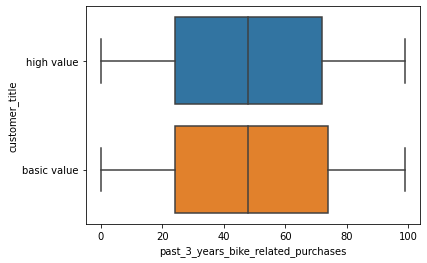

In [37]:
t_test(df.loc[df['customer_title']=='basic value','past_3_years_bike_related_purchases'], 
            df.loc[df['customer_title']=='high value','past_3_years_bike_related_purchases'])

sns.boxplot(data = df[['customer_title','past_3_years_bike_related_purchases']], 
             x='past_3_years_bike_related_purchases', y='customer_title')

t statistic is  0.09051441254667582
p value is  0.9278848064795333


<AxesSubplot:xlabel='tenure', ylabel='customer_title'>

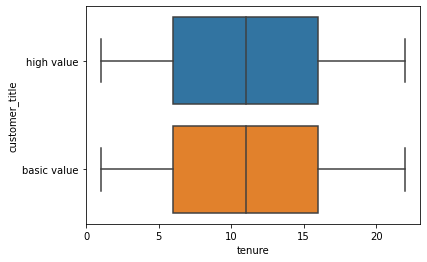

In [38]:
t_test(df.loc[df['customer_title']=='basic value','tenure'], 
            df.loc[df['customer_title']=='high value','tenure'])

sns.boxplot(data = df[['customer_title','tenure']], 
             x='tenure', y='customer_title')

interval columns not set, guessing: ['3_years_purchases', 'owns_car', 'tenure', 'age_class', 'postcode', 'property_valuation']


C:\Users\64223\AppData\Local\Temp\ipykernel_14376\1986931613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'customer_title':'customer_value',
C:\Users\64223\AppData\Roaming\Python\Python38\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable country for analysis 1. Dropping this column
  warnings.warn(


[Text(0.5, 1.0, 'The correlation of dataframe in phik method')]

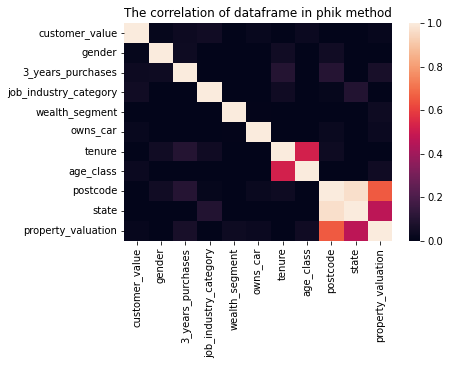

In [39]:
# phik matrix for correlation
df.rename(columns={'customer_title':'customer_value', 
                   'past_3_years_bike_related_purchases':'3_years_purchases'}, inplace=True)
p = sns.heatmap(df.phik_matrix())
p.set(title='The correlation of dataframe in phik method')

In [40]:
from pycaret.classification import *
experiment = setup(data = df, target = 'customer_value', fold_shuffle=True, session_id=2,
                  fix_imbalance=True)

,Description,Value
0,session_id,2
1,Target,customer_value
2,Target Type,Binary
3,Label Encoded,"basic value: 0, high value: 1"
4,Original Data,"(2850, 12)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
best_model = compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5376,0.5378,0.5238,0.5432,0.5331,0.0756,0.0755,0.0150
et,Extra Trees Classifier,0.5226,0.5254,0.5257,0.5276,0.5261,0.0451,0.0452,0.2220
ada,Ada Boost Classifier,0.5220,0.5293,0.5268,0.5273,0.5265,0.0440,0.0441,0.0550
lr,Logistic Regression,0.5060,0.5162,0.5119,0.5108,0.5108,0.0119,0.0119,1.3350
ridge,Ridge Classifier,0.5050,0.0000,0.5000,0.5090,0.5036,0.0102,0.0100,0.0140
gbc,Gradient Boosting Classifier,0.5040,0.5071,0.5218,0.5099,0.5148,0.0076,0.0077,0.0990
lightgbm,Light Gradient Boosting Machine,0.5040,0.5049,0.5068,0.5097,0.5074,0.0078,0.0077,0.0670
lda,Linear Discriminant Analysis,0.5035,0.5094,0.4980,0.5074,0.5017,0.0072,0.0070,0.0140
svm,SVM - Linear Kernel,0.5020,0.0000,0.6000,0.3038,0.4033,0.0000,0.0000,0.0170
rf,Random Forest Classifier,0.5015,0.5134,0.5018,0.5067,0.5036,0.0028,0.0028,0.1590


In [42]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5350,0.5460,0.5545,0.5385,0.5463,0.0696,0.0697
1,0.5050,0.5007,0.5347,0.5094,0.5217,0.0094,0.0094
2,0.5300,0.5370,0.5545,0.5333,0.5437,0.0595,0.0596
3,0.4550,0.4899,0.4554,0.4600,0.4577,-0.0900,-0.0900
4,0.5176,0.5272,0.5050,0.5258,0.5152,0.0355,0.0356
5,0.4774,0.4868,0.5248,0.4862,0.5048,-0.0467,-0.0469
6,0.5578,0.5876,0.5149,0.5714,0.5417,0.1167,0.1173
7,0.5075,0.5169,0.5446,0.5140,0.5288,0.0140,0.0140
8,0.4573,0.4858,0.4300,0.4574,0.4433,-0.0851,-0.0853


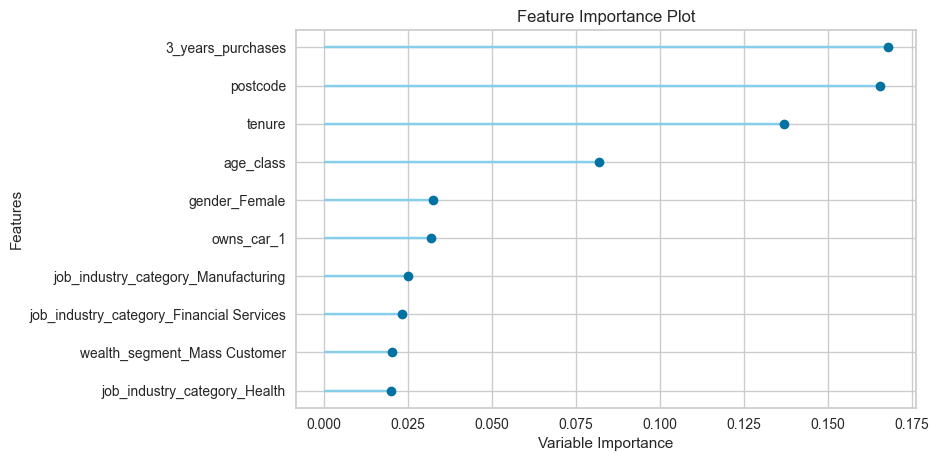

In [43]:
plot_model(rf, plot = 'feature')

In [44]:
df_new = df[['customer_value','3_years_purchases','tenure','postcode']]

In [45]:
experiment = setup(data = df_new, target = 'customer_value', fold_shuffle=True, session_id=2,
                  fix_imbalance=True)

,Description,Value
0,session_id,2
1,Target,customer_value
2,Target Type,Binary
3,Label Encoded,"basic value: 0, high value: 1"
4,Original Data,"(2850, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [46]:
best_model = compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5130,0.5043,0.5168,0.5186,0.5168,0.0260,0.0260,0.0580
qda,Quadratic Discriminant Analysis,0.5050,0.4942,0.5398,0.5100,0.5228,0.0094,0.0096,0.0080
svm,SVM - Linear Kernel,0.5020,0.0000,0.6000,0.3038,0.4033,0.0000,0.0000,0.0100
ada,Ada Boost Classifier,0.4970,0.5002,0.4841,0.5022,0.4926,-0.0057,-0.0058,0.0420
dummy,Dummy Classifier,0.4945,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
lightgbm,Light Gradient Boosting Machine,0.4934,0.4845,0.5029,0.4995,0.5010,-0.0134,-0.0134,0.0220
lr,Logistic Regression,0.4920,0.4749,0.5128,0.4991,0.5040,-0.0165,-0.0170,0.0120
dt,Decision Tree Classifier,0.4920,0.4921,0.4782,0.4978,0.4875,-0.0157,-0.0157,0.0080
et,Extra Trees Classifier,0.4915,0.4872,0.4910,0.4969,0.4938,-0.0171,-0.0171,0.1660
rf,Random Forest Classifier,0.4904,0.4857,0.4861,0.4976,0.4910,-0.0192,-0.0192,0.1370


In [47]:
data = pd.read_csv('NewCustomerList.csv',header=1)
data = data[['past_3_years_bike_related_purchases','postcode', 'tenure', 'gender']]

In [52]:
data.rename(columns={'past_3_years_bike_related_purchases':'3_years_purchases'}, inplace=True)

In [54]:
# predict model
pred_holdouts = predict_model(best_model, data=data)
pred_holdouts.head()

,3_years_purchases,postcode,tenure,gender,Label,Score
0,86,4500,14,Male,high value,0.5716
1,69,2113,16,Male,high value,0.5121
2,10,3505,10,Female,basic value,0.6102
3,64,4814,5,Female,basic value,0.5749
4,34,2093,19,Female,basic value,0.5232


In [55]:
pred_holdouts = pred_holdouts.drop(columns = 'Score')

In [56]:
pred_holdouts.to_csv('prediction.csv', index=False)